In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def segmented_image(image):
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  _,thresh=cv2.threshold(gray,np.mean(gray),255,cv2.THRESH_BINARY_INV)
  contours,hierarchy=cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  largest_contour=sorted(contours,key=cv2.contourArea)[-1]
  mask=np.zeros_like(gray)
  cv2.drawContours(mask,[largest_contour],-1,(255,255,255),thickness=cv2.FILLED)
  person=cv2.bitwise_and(image,image,mask=mask)
  return person

In [3]:
!git clone https://github.com/NishiSaxena2023/Image_processing_final.git

fatal: destination path 'Image_processing_final' already exists and is not an empty directory.


In [4]:
from PIL import Image
import os
import  matplotlib.pyplot as plt
image_folder='Image_processing_final/photo'
image_files=os.listdir(image_folder)
images=[]
segmented=[]
edges=[]
i=0
for image_file in image_files:
  image_path=os.path.join(image_folder,image_file)
  image=cv2.imread(image_path)
  seg_img=segmented_image(image)
  segment_gray=cv2.cvtColor(seg_img,cv2.COLOR_BGR2GRAY)
  edge=cv2.Canny(segment_gray,100,100)
  edges.append(edge)
  segmented.append(seg_img)
  images.append(image)
  i+=1






In [5]:
os.makedirs('segmented_imag_colab',exist_ok=True)
for i in range(len(segmented)):
  img=Image.fromarray(segmented[i].astype('uint8'))
  img.save(f'segmented_imag_colab/image_{i}.jpg')



In [6]:
os.makedirs('edges_imag_colab',exist_ok=True)
for i in range(len(edges)):
  img=Image.fromarray(edges[i].astype('uint8'))
  img.save(f'edges_imag_colab/image_{i}.jpg')

In [8]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img

image_size = (256, 256)  # resize image

def load_images_from_folder(folder, size):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

images = load_images_from_folder('/content/Image_processing_final/photo', size=image_size)
images = images.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# Split data into training and validation sets
train_images = images[:int(0.7 * len(images))]
val_images = images[int(0.7*len(images)):]


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [10]:
input_img = Input(shape=(256, 256, 3))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624  

In [12]:
autoencoder.fit(train_images, train_images,
                epochs=10,
                batch_size=16,
                shuffle=True,
                validation_data=(val_images, val_images))

Epoch 1/10
67/67 [==============================] - 504s 8s/step - loss: 0.5252 - val_loss: 0.5284
Epoch 2/10
67/67 [==============================] - 529s 8s/step - loss: 0.5255 - val_loss: 0.5201
Epoch 3/10
67/67 [==============================] - 530s 8s/step - loss: 0.5236 - val_loss: 0.5192
Epoch 4/10
67/67 [==============================] - 495s 7s/step - loss: 0.5232 - val_loss: 0.5218
Epoch 5/10
67/67 [==============================] - 530s 8s/step - loss: 0.5230 - val_loss: 0.5212
Epoch 6/10
67/67 [==============================] - 532s 8s/step - loss: 0.5229 - val_loss: 0.5181
Epoch 7/10
67/67 [==============================] - 499s 7s/step - loss: 0.5222 - val_loss: 0.5195
Epoch 8/10
67/67 [==============================] - 501s 7s/step - loss: 0.5223 - val_loss: 0.5174
Epoch 9/10
67/67 [==============================] - 504s 8s/step - loss: 0.5216 - val_loss: 0.5417
Epoch 10/10
67/67 [==============================] - 494s 7s/step - loss: 0.5307 - val_loss: 0.5187


In [14]:
encoded.shape

TensorShape([None, 32, 32, 16])

# New Section

1/1 [==============================] - 1s 604ms/step


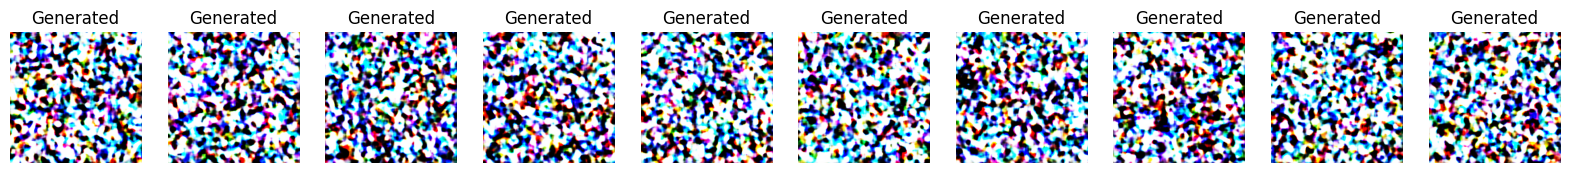

In [13]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoded.shape[1], encoded.shape[2], encoded.shape[3]))

# Decoder layers
decoder_layer = autoencoder.layers[-6](encoded_input)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_output = autoencoder.layers[-1](decoder_layer)

decoder = Model(encoded_input, decoder_output)

latent_dim = encoded.shape[1] * encoded.shape[2] * encoded.shape[3]
random_latent_vectors = np.random.normal(size=(10, encoded.shape[1], encoded.shape[2], encoded.shape[3]))
generated_images = decoder.predict(random_latent_vectors)

# To visualize the generated images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(generated_images[i])
    plt.title("Generated")
    plt.axis("off")
plt.show()

1/1 [==============================] - 0s 89ms/step


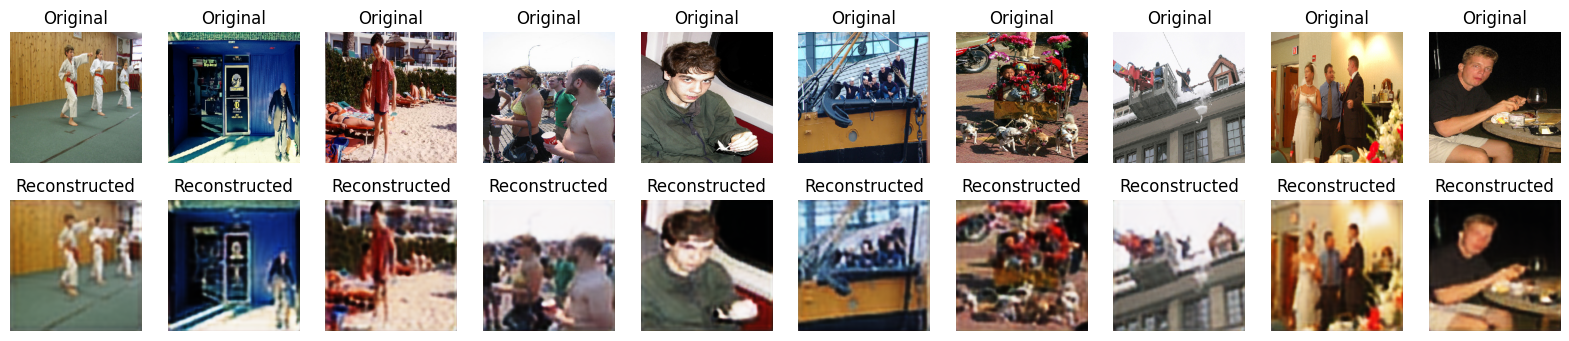

In [16]:
import matplotlib.pyplot as plt




# Visualize some of the original and reconstructed images
def plot_reconstruction(model, images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i])
        plt.title("Original")
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        reconstructed_img = model.predict(images[i].reshape(1, 256, 256, 3))
        plt.imshow(reconstructed_img.reshape(256, 256, 3))
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

# Plot reconstruction results
plot_reconstruction(autoencoder, val_images)